In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()

In [31]:
def plot_pca_components(x, coefficients=None, mean=0, components=None, imshape=(8, 8), n_components=8, fontsize=12, show_mean=True):
    if coefficients is None:
        coefficients = x
    
    if components is None:
        components = np.eye(len(coefficients), len(x))
    
    mean = np.zeros_like(x) + mean
    
    fig = plt.figure(figsize=(1.2 * (5+n_components), 1.2*2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)
    
    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest')
        if title:
            ax.set_title(title, fontsize=fontsize)
    
    show(slice(2), slice(2), x, 'True')
    
    approx = mean.copy()
    
    counter = 2
    if show_mean:
        show(0, 2, mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1
    
    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + counter,  approx, r'${0:.2f}\cdot c_{1}$'.format(coefficients[i], i +1))
    
    show(slice(2), slice(-2, None), approx, 'Approx')
    return fig

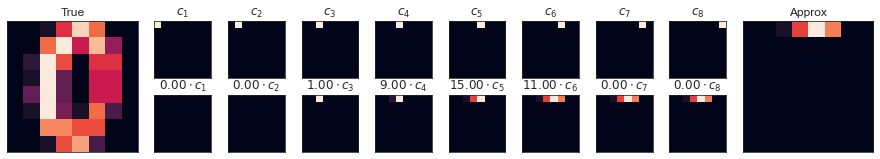

In [32]:
digits = load_digits()
sns.set_style('white')

fig = plot_pca_components(digits.data[10], show_mean=False)
fig.savefig('figures/digits-pixel-components.png')

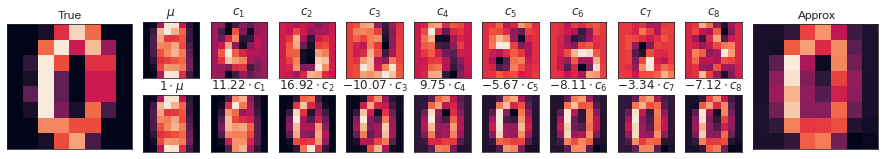

In [33]:
pca = PCA(n_components=8)
Xproj = pca.fit_transform(digits.data)
fig = plot_pca_components(digits.data[10], Xproj[10], pca.mean_, pca.components_)

In [25]:
digits.data[10]

array([ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.,  0.,  0., 11., 16.,  8.,
       14.,  6.,  0.,  0.,  2., 16., 10.,  0.,  9.,  9.,  0.,  0.,  1.,
       16.,  4.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  8.,
        0.,  0.,  1., 16.,  5.,  1., 11.,  3.,  0.,  0.,  0., 12., 12.,
       10., 10.,  0.,  0.,  0.,  0.,  1., 10., 13.,  3.,  0.,  0.])

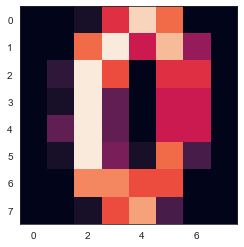

In [26]:
plt.imshow(digits.data[10].reshape(8,8))

Text(0, 0.5, 'cumulative explained variance')

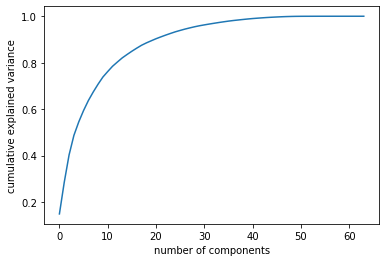

In [3]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

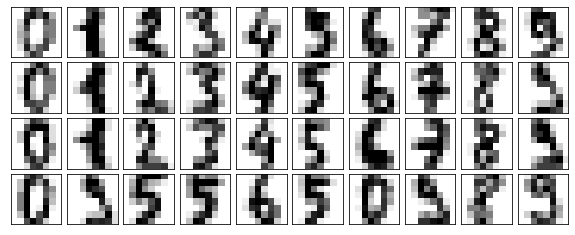

In [22]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                 cmap='binary', interpolation='nearest',
                 clim=(0, 16))
plot_digits(digits.data)

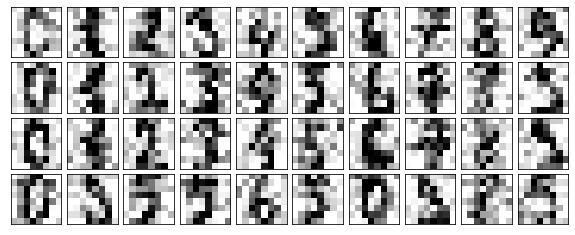

In [32]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [33]:
pca = PCA(0.5).fit(noisy)
pca.n_components_

12

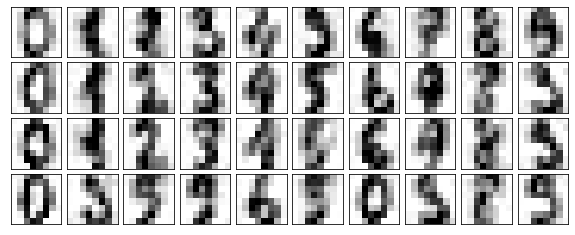

In [34]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)